# Car Price Prediction Using  Multiple Linear Regression

# Problem Statement :-
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.
# Business Goal :-
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
#import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('CarPrice_Assignment (2).csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Explanatory Data Analysis 

In [3]:
df.shape

(205, 26)

The dataset have total 205 rows and 26 columns.

In [4]:
## Checking datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Checking missing Value 
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Hence the dataset doesnot contains any missing values in any columns.

In [6]:
# summary of numerical data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


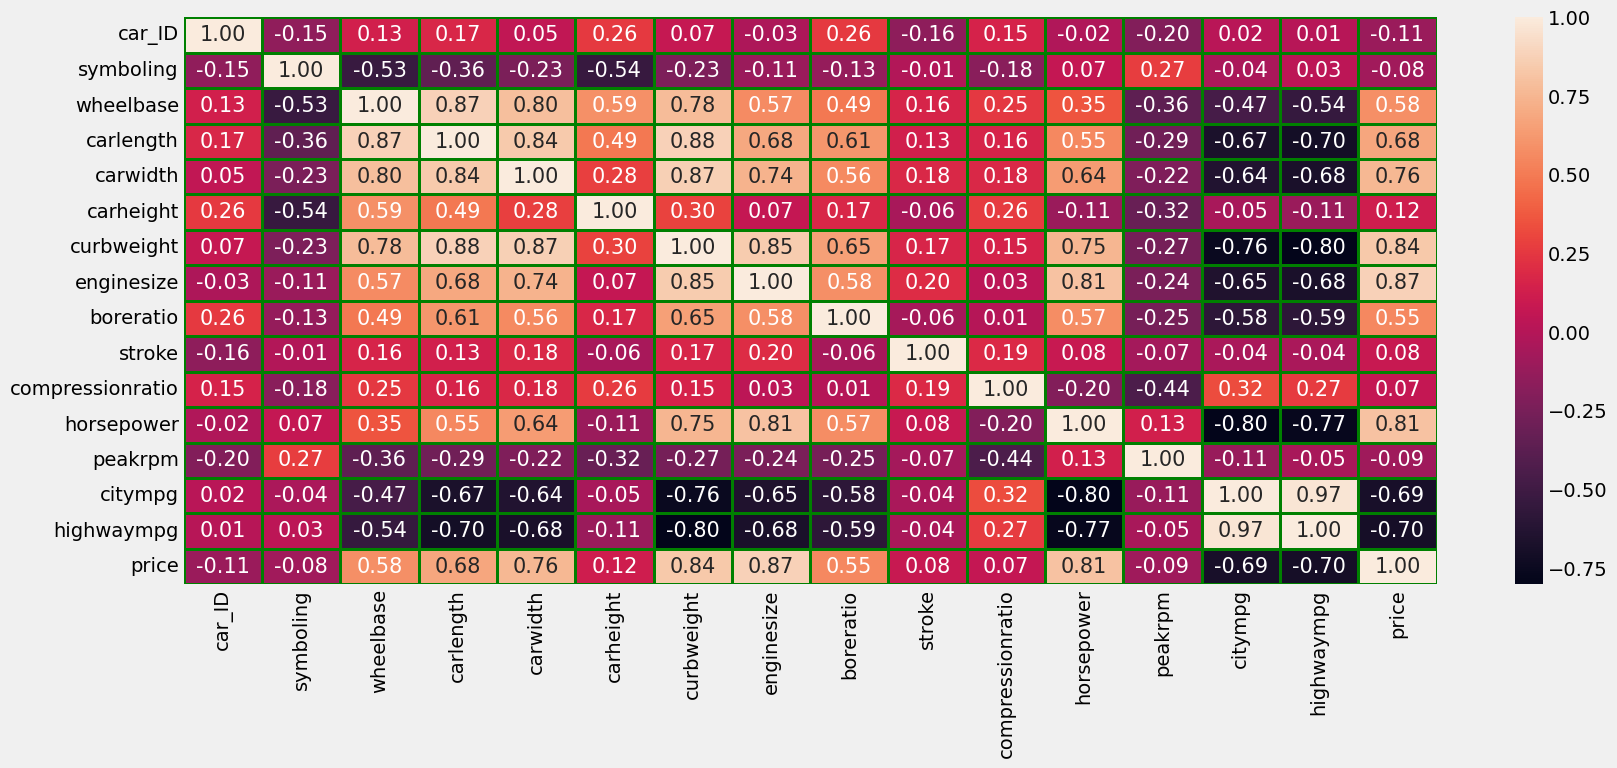

In [7]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'green')

plt.show()


# 1.Univariate Analysis

In [8]:
#selection of numerical and categorical colmuns
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [9]:
# numerical columns
num_cols.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of symboling ')

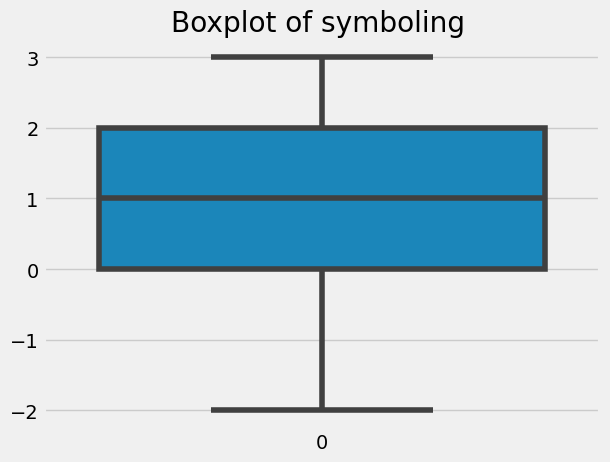

In [10]:
# Checking outlier
plt1=sns.boxplot(df['symboling'])
plt.title("Boxplot of symboling ")

Text(0.5, 1.0, 'Boxplot of wheelbase ')

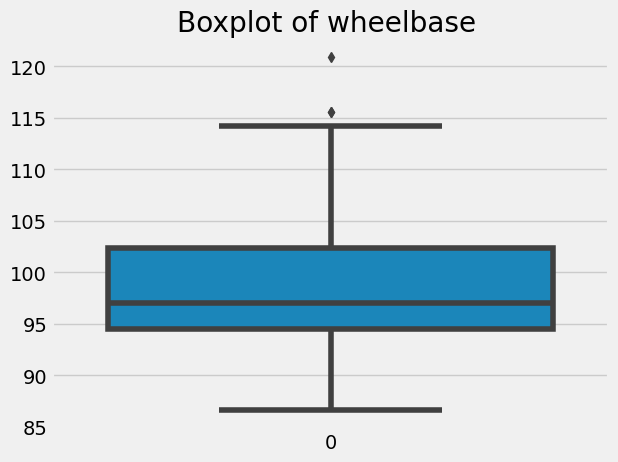

In [11]:
plt2=sns.boxplot(df['wheelbase'])
plt.title("Boxplot of wheelbase ")

Text(0.5, 1.0, 'Boxplot of carlength')

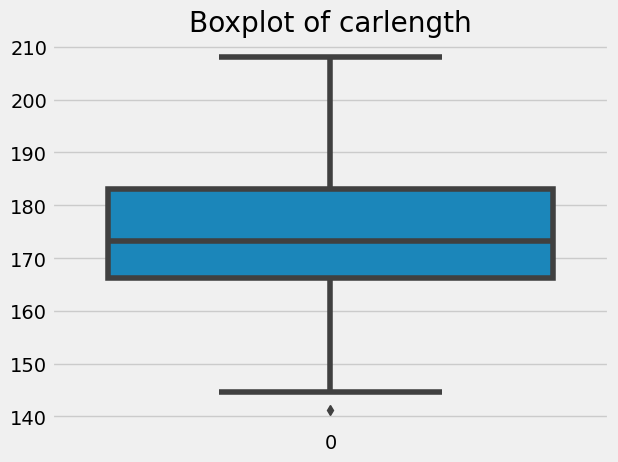

In [12]:
plt3=sns.boxplot(df['carlength'])
plt.title("Boxplot of carlength")

Text(0.5, 1.0, 'Boxplot of carwidth')

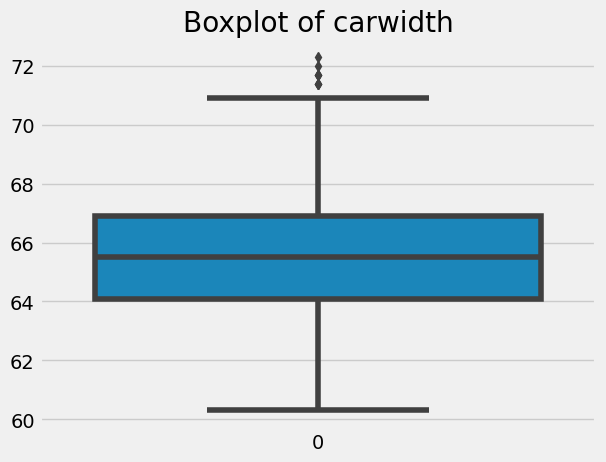

In [13]:
plt4=sns.boxplot(df['carwidth'])
plt.title("Boxplot of carwidth")

Text(0.5, 1.0, 'Boxplot of carheight')

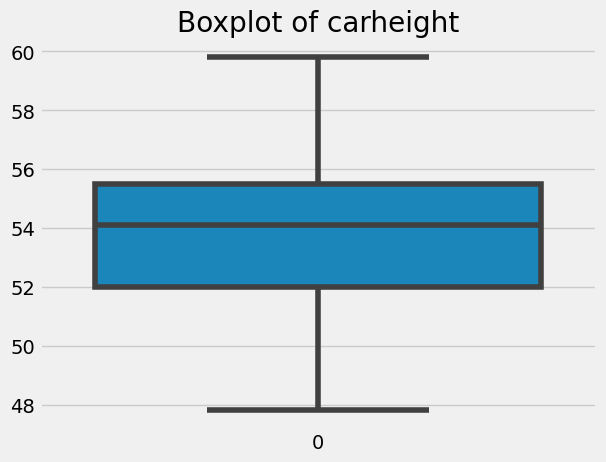

In [14]:
plt6=sns.boxplot(df['carheight'])
plt.title("Boxplot of carheight")

Text(0.5, 1.0, 'Boxplot of enginesize')

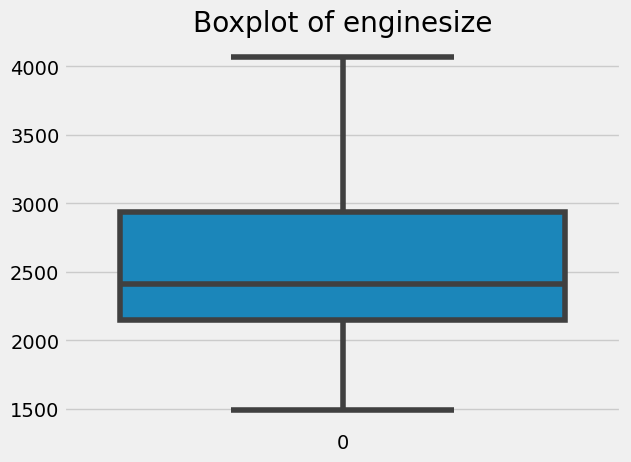

In [15]:
plt7=sns.boxplot(df['curbweight'])
plt.title("Boxplot of enginesize")

Text(0.5, 1.0, 'Boxplot of boreratio')

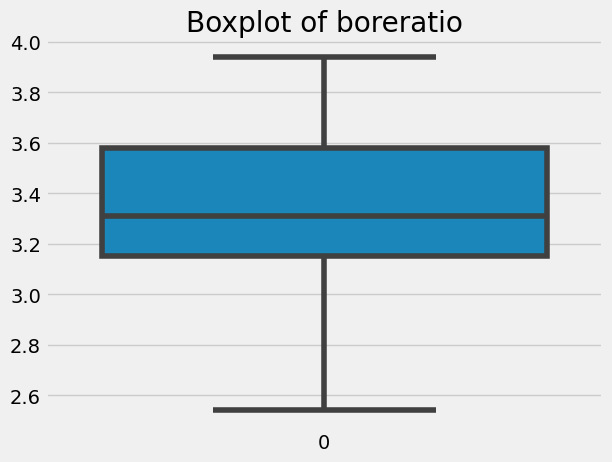

In [16]:
plt8=sns.boxplot(df['boreratio'])
plt.title("Boxplot of boreratio")

Text(0.5, 1.0, 'Boxplot of stroke')

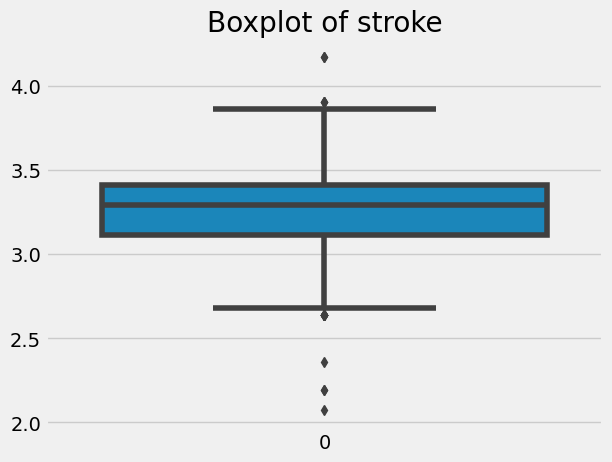

In [17]:
plt9=sns.boxplot(df['stroke'])
plt.title("Boxplot of stroke")

Text(0.5, 1.0, 'Boxplot of compressionratio')

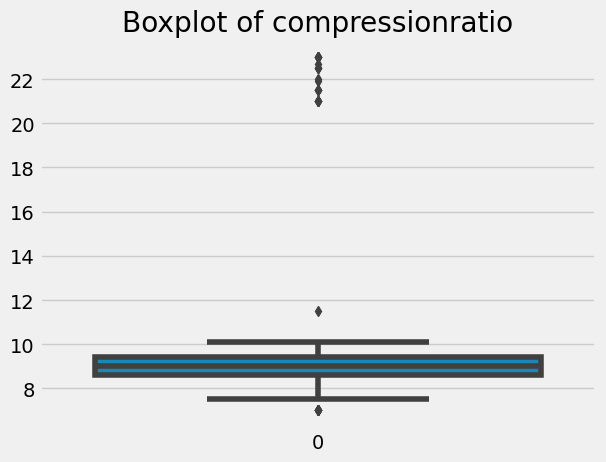

In [18]:
plt10=sns.boxplot(df['compressionratio'])
plt.title("Boxplot of compressionratio")

Text(0.5, 1.0, 'Boxplot of horsepower')

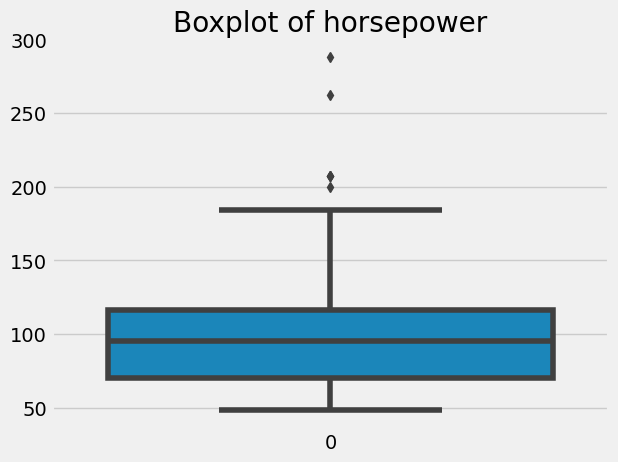

In [19]:
plt11=sns.boxplot(df['horsepower'])
plt.title("Boxplot of horsepower")

Text(0.5, 1.0, 'Boxplot of peakrpm')

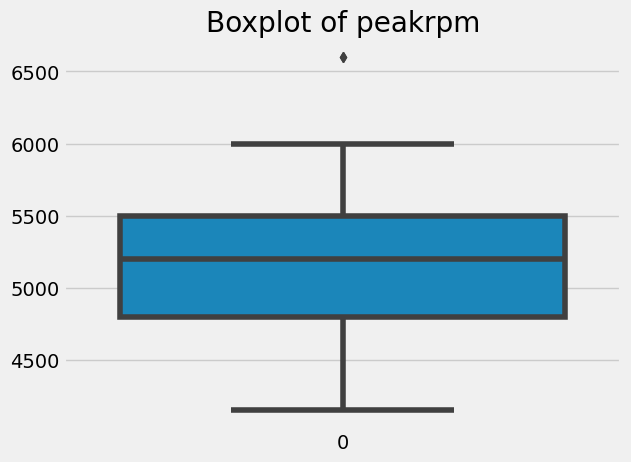

In [20]:
plt12=sns.boxplot(df['peakrpm'])
plt.title("Boxplot of peakrpm")

Text(0.5, 1.0, 'Boxplot of citympg')

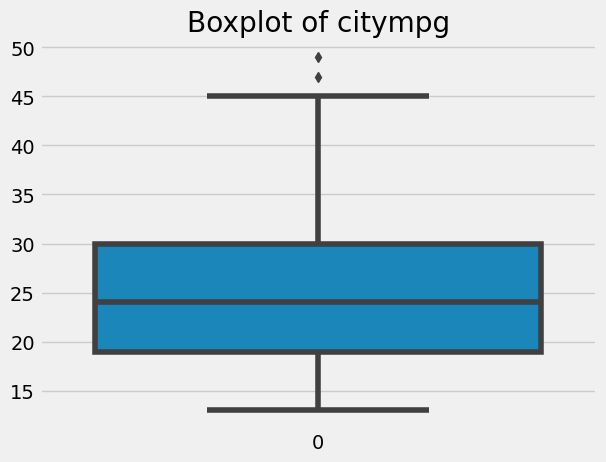

In [21]:
plt13=sns.boxplot(df['citympg'])
plt.title("Boxplot of citympg")

Text(0.5, 1.0, 'Boxplot of highwaympg')

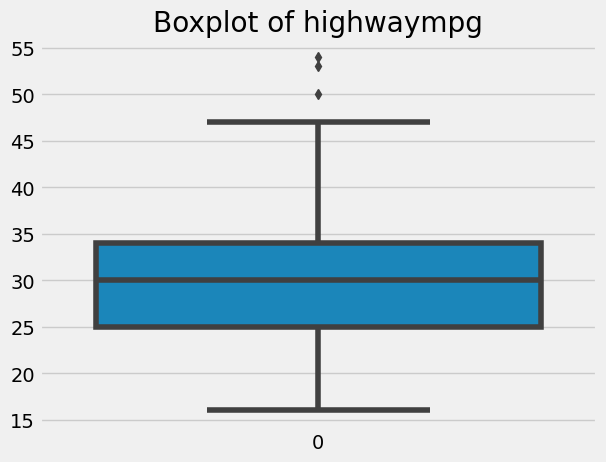

In [22]:
plt14=sns.boxplot(df['highwaympg'])
plt.title("Boxplot of highwaympg")

Text(0.5, 1.0, 'Boxplot of price')

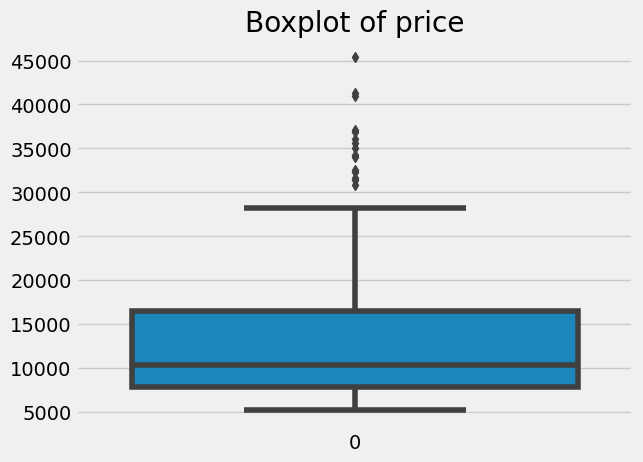

In [23]:
plt15=sns.boxplot(df['price'])
plt.title("Boxplot of price")

In [24]:
carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],

SyntaxError: unterminated string literal (detected at line 1) (1827204733.py, line 1)

In [ ]:
# categoricals columns
cat_cols.columns

In [ ]:
# Histogram along with density plot of each numerical variable
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Countplot of each categorical variables
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# 2. Bivariate Data Analysis 

In [ ]:
# Scatter plot of each numerical variable with the target variable price.

cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df,ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]

In [ ]:
df1 = pd.DataFrame(df['CarName'].value_counts().reset_index())
df1.columns = ['Car Name', 'No of Cars']
plt.figure(figsize = (12, 10))
sns.barplot(x = 'No of Cars', y = 'Car Name', data = df1)
plt.yticks(size = 12)
plt.show()

 Toyota  cars are used mostly in this dataset.

# Data Preprocessing

In [ ]:
# encoding ordinal categorical columns

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [ ]:
#glimpse of the dataset after preprocessing
df.head()

In [ ]:
# Columns of the dataset after preprocessing
df.columns

In [ ]:
# creating dependent and independent variables.
reqd=df[['doornumber', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']].reset_index(drop=True)
X=reqd.drop(["price"],axis=1)
Y=reqd["price"]
print(X.shape,Y.shape)       

Here we have selected some important independent features and the target variable to do the further analysis.

In [ ]:
# split the dataset in Training and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Here we split our total dataset into train_set and test_set in 80:20 ratio.So we have 80% training dataset and 20% test dataset.
we did the split in independent variables as well as the target variable also.

In [ ]:
## Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scl=sc.fit_transform(X_train)
x_t_scl=sc.fit_transform(X_test) 
X_train=pd.DataFrame(x_scl,columns=X_train.columns)
X_test=pd.DataFrame(x_t_scl,columns=X_test.columns)


Here we scale our dataset by using StandardScaler since the unit of measurement for each variables are differnt . By using 
standardization we make the variables mean 0 and standrad deviation 1 which will help us to do the further Analysis.

# Multiple Linear Regression 


In [ ]:
# Fitting the model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
lr=LinearRegression(fit_intercept=True)
model=lr.fit(X_train,Y_train)

Here we build the linear model using training dataset .

In [ ]:
# summary of the model
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Model score : ', model.score(X_train, Y_train))

The value of R2 of the model based on training dataset is 0.83

In [ ]:
#display adjusted R-squared for training data 
1 - (1-model.score(X_train,Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)

The value of Adjusted R2 of the model based on training dataset is 0.82

In [ ]:
# predicting on the X_test data set
Y_pred=lr.predict(X_test)
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df1)

In [ ]:
#display  R-squared for test data 
model.score(X_test,Y_test)

The value of R2 of the model based on training dataset is 0.74

In [ ]:
#display adjusted R-squared for test data 
1 - (1-model.score(X_test,Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

The value of Adjusted R2 of the model based on training dataset is 0.59

In [ ]:
#display of root_mean_square and mean_absolute_error for model evalution
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test, Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)


In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
mae

# Check model assumptions

# 1. There exists a linear relationship between the predictor variables and the response variable.

In [ ]:
# Scatter plots of each dependents variables with independent variable
cols = X.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the above scatter plots of traget variable price with the other independent variables ,we can see that there is linear relationship between price and Wheelbase , Car Length ,Car Width, car height, curb weight, cylinder number, bore ratio, stroke , horses power, peakrpm, citympg  ,highwaympg variables. 
Hence we can say that the assumption of linear regression of dependent variable and indepemdent variables is hold for maximum independent variables.

# 2. Verify that multicollinearity doesn’t exist among predictor variables.

In [ ]:
# Varice Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

To check the multicolineartity among the independent variables , we have calculated the VIF for each independent variables.
From above table it is clear that value of VIF for some independent variables are very large .It imply that Multicolinertiy are present in the dataset.  

In [ ]:
#Another technquie 
plt.figure(figsize = (18, 7))
sns.heatmap(X.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'green')
plt.show()

From the above heatmap we can easily see the high correlation between independent variables. Which is indication of Multicolinearity.

In [ ]:
Y_train=Y_train.reshape(-1,1) 
Y_test=Y_test.reshape(-1,1) 

In [ ]:
# Summary of the model 
mod = sm.OLS(Y_train,X_train)
fii = mod.fit()
fii.summary()

# Remove Multicolinearity

In [ ]:
X_train_1=X_train.drop( ['doornumber','wheelbase','carlength','carheight','boreratio','stroke','citympg','highwaympg'], axis=1)
X_test_1 =X_test.drop  (['doornumber','wheelbase','carlength','carheight','boreratio','stroke','citympg','highwaympg'], axis=1)

We have seen that the dataset has multicolinearity problem due to high correlation between the independent variables .To remove
the multicolinearity we drop some independent variables from the model .since those variables are not so much important and they didnot provide any extra information.

In [ ]:
# Fitting the model 
lr=LinearRegression(fit_intercept=True)
model1=lr.fit(X_train_1,Y_train_1)

In [ ]:
# summary of the model
print('model intercept :', model1.intercept_)
print('model coefficients : ', model1.coef_)
print('Model score : ', model1.score(X_train_1, Y_train_1))

The value of R2 of the model based on training dataset is 0.82 after removing the multicolinearity problem.

In [ ]:
#display adjusted R-squared for test data 
1 - (1-model1.score(X_test_1,Y_test))*(len(Y_test)-1)/(len(Y_test)-X_test_1.shape[1]-1)

The value of Adjusted R2 of the model based on training dataset is 0.70 after removing the multicolinearity problem.

# 3. Normality of residuals.

In [ ]:
Y_pred=model1.predict(X_test_1)
Y_pred=Y_pred.reshape(-1,1) 
Y_test=Y_test.reshape(-1,1)

In [ ]:
residual=Y_test-Y_pred

In [ ]:
# Distribution plot of the residuals
sns.displot(residual,kind='kde')

In [ ]:
#QQ plot of residuals
import numpy as np
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
sm.qqplot(residual,line='45',fit=True,dist=stats.norm)
py.show()


From the residuals plot we can see that sample quantiles does not match with theoritcal quantile in most of the cases. So it is a indication that normality of the error assumption is not hold perfeclty for the dataset.
Also the p-value of Jarque-Bera test is 6.73e-07 which is very very than 0.05 . Hence we conclude that distribution of the residulas are not normal at 5% level of significance.

# 4.  Homoscedasticity of residuals.

In [ ]:
plt.scatter(Y_pred,residual)
plt.xlabel("Y_pred")
plt.ylabel("residual")
plt.title("Scatter plot of residuals vs predicted value of y")

From the above plot we can see that residuals are randomly distributed against the predicted values and there is no any particular partten in the data points of the scatter plot .Hence we can say that variance of the residuals are constant, so assumption of the homosecdasticity for the linear regression is hold. 

# 5. Autocorrelation  of  residuals.

In [ ]:
plt.plot(residual)

From the above plot we can see that residuals are randomly distributed ie there is no any particular partten.Hence we can say that the residuals are not correlated.
Also we can see that the value of Durbin-Watson statistic is 2.174 ~2 . Hence we can say that there is no Autocorrelation among the residuals .Therefore the assumption of autocorrelation is hold   for the dataset.

In [ ]:
#Sumaary of the final model
model2 = sm.OLS(Y_train_1,X_train_1).fit()
model2.summary()

#                                Thank You